<a href="https://colab.research.google.com/github/johhan27/DS-Unit-2-Linear-Models/blob/master/LS_DS_213_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [8]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def sale_price_cleaner (price):
  for i, char in enumerate(price):
    if char.isdigit():
      return price[i:].replace(",","")

def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols)
    df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
    df = df.set_index('SALE DATE')
    df['BOROUGH'] = df['BOROUGH'].astype('object')
    df['SALE PRICE'] = df['SALE PRICE'].apply(sale_price_cleaner)
    df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])
    df = df[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') &
        (df['SALE PRICE'] >= 100000) &
        (df['SALE PRICE'] <= 2000000)]

    return df

filepath = DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv'

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [11]:
df = wrangle(filepath)

In [12]:
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-04-30,4,ROSEDALE,01 ONE FAMILY DWELLINGS,1478.0,1925.0,635000
2019-04-30,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1280.0,1930.0,514000
2019-04-30,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1333.0,1945.0,635000
2019-04-30,4,SPRINGFIELD GARDENS,01 ONE FAMILY DWELLINGS,1020.0,1935.0,545000
2019-04-30,4,ST. ALBANS,01 ONE FAMILY DWELLINGS,1224.0,1945.0,510000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3164 entries, 2019-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BOROUGH                  3164 non-null   object 
 1   NEIGHBORHOOD             3164 non-null   object 
 2   BUILDING CLASS CATEGORY  3164 non-null   object 
 3   GROSS SQUARE FEET        3164 non-null   float64
 4   YEAR BUILT               3164 non-null   float64
 5   SALE PRICE               3164 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 173.0+ KB


**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [14]:
# Perform your exploratory data analysis here and
# modify the wrangle function above
#df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
#df = df.set_index('SALE DATE')
#df['BOROUGH'] = df['BOROUGH'].astype('object')


In [15]:
#def sale_price_cleaner (price):
  #for i, char in enumerate(price):
   # if char.isdigit():
    #  return price[i:].replace(",","")

#df['SALE PRICE'] = df['SALE PRICE'].apply(sale_price_cleaner)

In [16]:
#df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])

In [17]:
#df = df[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS') &
 #       (df['SALE PRICE'] >= 100000) &
  #      (df['SALE PRICE'] <= 2000000)]

In [29]:
df.sort_index()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-01-01,3,OCEAN PARKWAY-NORTH,01 ONE FAMILY DWELLINGS,1325.0,1930.0,550000
2019-01-01,4,QUEENS VILLAGE,01 ONE FAMILY DWELLINGS,2001.0,1940.0,200000
2019-01-02,2,PELHAM PARKWAY SOUTH,01 ONE FAMILY DWELLINGS,2043.0,1925.0,810000
2019-01-02,3,FLATBUSH-CENTRAL,01 ONE FAMILY DWELLINGS,2680.0,1899.0,125000
2019-01-02,3,FLATBUSH-EAST,01 ONE FAMILY DWELLINGS,1872.0,1940.0,620000
...,...,...,...,...,...,...
2019-04-30,4,ROSEDALE,01 ONE FAMILY DWELLINGS,1478.0,1925.0,635000
2019-04-30,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1280.0,1930.0,514000
2019-04-30,4,SOUTH OZONE PARK,01 ONE FAMILY DWELLINGS,1333.0,1945.0,635000


# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [31]:
df.BOROUGH.value_counts()

4    1585
5     740
3     542
2     294
1       3
Name: BOROUGH, dtype: int64

In [33]:
#newdf = df.select_dtypes(include=numerics)
features= df.select_dtypes(include=np.number).columns.to_list()
features.remove('SALE PRICE')
features.append('BOROUGH') #adding "BOROUGH" in order to encode it
target = 'SALE PRICE'
X = df[features] 
y = df[target]

In [34]:
features

['GROSS SQUARE FEET', 'YEAR BUILT', 'BOROUGH']

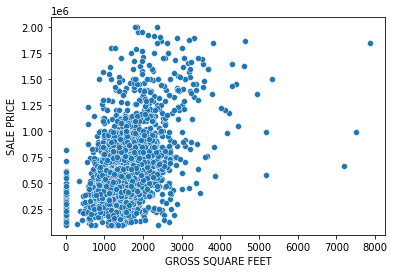

In [35]:
import seaborn as sns

sns.scatterplot(data=df, x='GROSS SQUARE FEET', y='SALE PRICE')

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [36]:
X_train, y_train = X.loc['2019-01-01':'2019-03-31'], y.loc['2019-01-01':'2019-03-31']
X_test, y_test = X.loc['2019-04-01':'2019-04-30'], y.loc['2019-04-01':'2019-04-30']

In [23]:
#(y_test == y[(y.index.month==4) & (y.index.year==2019)]) also a way to get a specific month-year

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [37]:
from sklearn.metrics import mean_absolute_error
y_train_mean = y_train.mean()
baseline_mae = mean_absolute_error(y_train, [y_train_mean for i in range(len(y_train))]) 
print('Baseline MAE:', baseline_mae)

Baseline MAE: 216497.12357684076


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [38]:
import category_encoders as ce 

ohe = ce.OneHotEncoder(use_cat_names=True)

XT_train = ohe.fit_transform(X_train)
XT_test = ohe.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [40]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(XT_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [41]:
from sklearn.linear_model import Ridge
model_r = Ridge()
model_r.fit(XT_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [43]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 180271.48264501733
Linear Test MAE: 184076.12618229561


**Task 10:** Check the training and test metrics for `model_r`.

In [44]:
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 180290.51998094821
Ridge Test MAE: 180290.51998094821


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [45]:
# Caculate R^2 score

from sklearn.metrics import r2_score
training_r2 = r2_score(y_train, model_r.predict(XT_train))
test_r2 = r2_score(y_test, model_r.predict(XT_test))

print('Training R2:', training_r2)
print('Test R2:', test_r2)

Training R2: 0.3038614801610666
Test R2: 0.27039732990084764


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

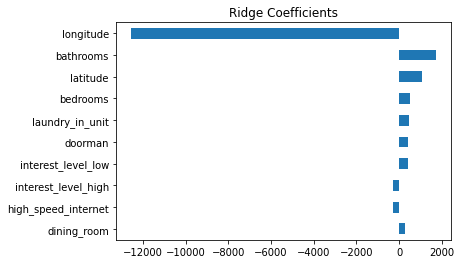

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

In [48]:
model_r.coef_

array([    226.23602808,     191.75093326,  144394.7145174 ,
         40140.14446855, -152363.3336693 ,  -97780.49900364,
         65608.97368705])

In [49]:
XT_train.columns

Index(['GROSS SQUARE FEET', 'YEAR BUILT', 'BOROUGH_3.0', 'BOROUGH_4.0',
       'BOROUGH_2.0', 'BOROUGH_5.0', 'BOROUGH_1.0'],
      dtype='object')

<BarContainer object of 7 artists>

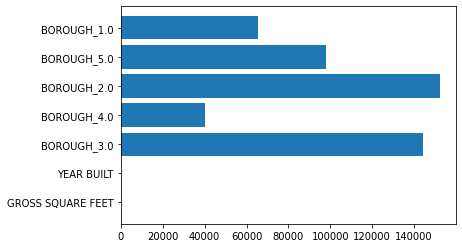

In [51]:
plt.barh(XT_train.columns, abs(model_r.coef_))